In [13]:
import numpy as np
import nibabel as nib
from modalities.nifti_image import NiftiImage

In [14]:
nifti_image = NiftiImage('data/Yagishita_Sharapova_20240207_HF4_G5_11_3_1.nii')
nifti_image

In [15]:
print("Raw Image Data:", nifti_image.image_data)

Raw Image Data: [[[4.70808993 0.71929152 2.20146798 ... 5.8633157  5.25300775 3.83622143]
  [1.7219403  4.44652938 5.12222747 ... 5.05683734 2.28865483 4.66449651]
  [4.11957869 5.38378803 3.37849046 ... 3.66184773 5.53636501 5.42738145]
  ...
  [2.44123182 4.55551294 1.59116002 ... 6.82237106 6.40823352 3.87981485]
  [4.8170735  8.34814095 5.66714529 ... 4.66449651 6.7133875  5.36199131]
  [4.68629322 5.29660117 5.42738145 ... 3.48747402 4.16317212 4.33754582]]

 [[2.98614963 2.81177593 3.98879842 ... 4.79527678 3.72723786 2.15787455]
  [4.72988665 3.18232005 1.52576989 ... 3.70544115 2.04889099 2.57201209]
  [5.03504062 5.40558474 3.66184773 ... 3.16052333 5.90690913 6.21206311]
  ...
  [8.89305876 5.05683734 6.43003023 ... 6.7133875  4.09778198 3.11692991]
  [5.42738145 3.59645759 6.56081051 ... 7.32369545 7.585256   5.14402419]
  [4.49012281 2.72458908 3.18232005 ... 3.70544115 5.62355186 4.79527678]]

 [[3.20411676 3.31310032 3.02974306 ... 1.78733044 5.84151899 3.33489704]
  [4.3

In [16]:
alignment_params = np.array([
    -2.9204,    # X translation
    -24.6918,    # Y translation
    -39.0698,    # Z translation
    np.pi * 0.5,  # X rotation (pitch)
    0,    # Y rotation (roll)
    0,    # Z rotation (yaw)
    10,   # X scaling
    10,   # Y scaling
    10,   # Z scaling
    0,    # X affine
    0,    # Y affine
    0     # Z affine
])

In [17]:
nifti_image.update_affine_matrix(alignment_params)

In [18]:
nifti_image.save('rotated.nii')

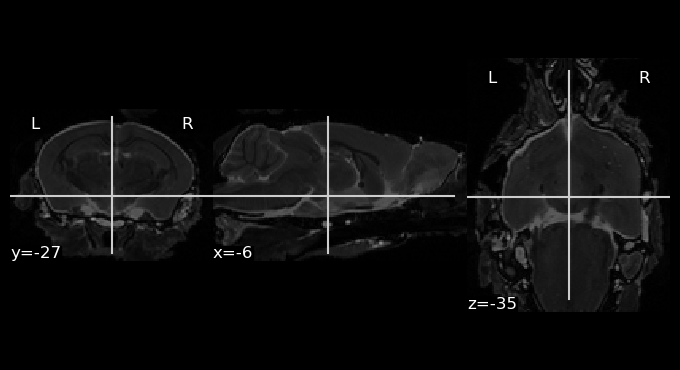

In [18]:
crosshair_position = [62.7, 95, 35.8]
nifti_image.plot_with_crosshair(crosshair_position)

In [21]:
# getting params from template image to reorient all images accordingly
template = nib.load('AverageT2.nii')
template.affine

array([[ -1.,   0.,   0.,  55.],
       [  0.,   1.,   0., -95.],
       [  0.,   0.,   1., -75.],
       [  0.,   0.,   0.,   1.]])

# testing new logic

In [20]:
nifti_image = NiftiImage('data/Yagishita_Sharapova_20240207_HF4_G5_11_3_1.nii')
image_data = nifti_image.image_data
print("Image Data Shape:", image_data.shape)

Image Data Shape: (128, 160, 96)


In [21]:
alignment_params = np.array([
    -2.9204,    # X translation
    -24.6918,    # Y translation
    -39.0698,    # Z translation
    np.pi * 0.5,  # X rotation (pitch)
    0,    # Y rotation (roll)
    0,    # Z rotation (yaw)
    10,   # X scaling
    10,   # Y scaling
    10,   # Z scaling
    0,    # X affine
    0,    # Y affine
    0     # Z affine
])

nifti_image.update_affine_matrix(alignment_params)

In [22]:
nifti_image.save('updated_image_file.nii')

In [10]:
def find_origin_voxel(image_file_path):
    """
    Find the voxel coordinates of the origin (0, 0, 0) in the world coordinates for a NIfTI image.
    :param image_file_path: Path to the NIfTI image file.
    :return: Voxel coordinates of the origin.
    """
    img = nib.load(image_file_path)
    affine = img.affine
    
    qform = img.get_qform()
    sform = img.get_sform()
    print("Q-form matrix:\n", qform)
    print("S-form matrix:\n", sform)

    
    affine_inv = np.linalg.inv(affine) # Invert the affine matrix
    world_origin = np.array([0, 0, 0, 1]) # World origin in homogeneous coordinates 
    voxel_origin = np.dot(affine_inv, world_origin)[:3] # Find the voxel coordinates corresponding to the world origin

    return voxel_origin

voxel_origin = find_origin_voxel('data/AverageT2.nii')
print("Voxel coordinates of the origin:", voxel_origin)

Q-form matrix:
 [[ -1.   0.   0.  55.]
 [  0.   1.   0. -95.]
 [  0.   0.   1. -75.]
 [  0.   0.   0.   1.]]
S-form matrix:
 [[ -1.   0.   0.  55.]
 [  0.   1.   0. -95.]
 [  0.   0.   1. -75.]
 [  0.   0.   0.   1.]]
Voxel coordinates of the origin: [55. 95. 75.]


In [11]:
def find_origin_voxel(image_file_path):
    """
    Find the voxel coordinates of the origin (0, 0, 0) in the world coordinates for a NIfTI image.
    :param image_file_path: Path to the NIfTI image file.
    :return: Voxel coordinates of the origin.
    """
    img = nib.load(image_file_path)
    affine = img.affine

    qform = img.get_qform()
    sform = img.get_sform()
    print("Q-form matrix:\n", qform)
    print("S-form matrix:\n", sform)

    affine_inv = np.linalg.inv(affine)  # Invert the affine matrix
 
    world_origin = np.array([0, 0, 0, 1]) # World origin in homogeneous coordinates

    voxel_origin = np.dot(affine_inv, world_origin)[:3] # Find the voxel coordinates corresponding to the world origin

    return voxel_origin

voxel_origin = find_origin_voxel('updated_image_file.nii')
print("Voxel coordinates of the origin:", voxel_origin)

Q-form matrix:
 [[-1.00000000e+00  0.00000000e+00  0.00000000e+00  5.73741264e+01]
 [ 0.00000000e+00 -1.00000000e+00 -4.44089210e-16  5.95837402e+01]
 [ 0.00000000e+00 -4.44089210e-16  1.00000000e+00 -7.56434021e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
S-form matrix:
 [[-1.00000000e+00 -3.06161713e-17  3.06161713e-17  5.73741264e+01]
 [ 3.06161713e-17 -1.00000000e+00 -6.12323426e-17  5.95837402e+01]
 [ 3.06161713e-17 -6.12323426e-17  1.00000000e+00 -7.56434021e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Voxel coordinates of the origin: [57.37412643 59.58374023 75.6434021 ]
